In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

import glob

glob.glob("*", recursive=True)

['Copy of TheChateauSte.MichelleGreatEXchange_Valid Entries.xlsx',
 'extract_data.ipynb',
 'images_text_analysis.csv',
 'image_and_text_analysis.pptx',
 'Proposal.docx',
 'text_image_dashboard.pbix']

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import csv
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import requests
from selenium.webdriver.common.by import By
import csv

options = Options()
options.headless = False
driver = webdriver.Chrome(
                executable_path=ChromeDriverManager().install(), options=options
            )

# Go to the website
driver.get("https://www.thegreatexchange.wine/gallery")

# Click on the "YES" button if it exists
try:
    yes_button = driver.find_element(By.XPATH, '//*[@id="ageGateAllow"]')
    yes_button.click()
except Exception as e:
    print(e)
    try:
        age_gate_button = driver.find_element(By.ID, "ageGateAllow")
        age_gate_button.click()
    except Exception as e:
        print(e)
        print("Button ('YES') not found")
        pass

# Wait for the page to load
driver.implicitly_wait(10)

try:
    yes_button = driver.find_element(By.XPATH, "//button[text()='View Gallery']")
    yes_button.click()
except:
    print("Button ('View Gallery') not found")
    pass

# wait for the page to load
time.sleep(50)

# scroll down the page
def scroll_down():
    # Get the current scroll height
    current_scroll_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        # Scroll down to the bottom of the page
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Wait for the page to load
        time.sleep(5)

        # Get the new scroll height
        new_scroll_height = driver.execute_script("return document.body.scrollHeight")

        # If the new scroll height is the same as the old scroll height, then there's no more content to load
        if new_scroll_height == current_scroll_height:
            break

        # Update the current scroll height
        current_scroll_height = new_scroll_height

# keep scrolling down the page until no more images can be loaded
scroll_down()

In [13]:
dataset = []
count = 0
for i in driver.find_elements(By.CLASS_NAME, value = "galCaptionCopy"):
    source = i.get_attribute("innerHTML")
    if source != "":
        print(source)
        print("--------")
        dataset.append(source)
        count+=1
count

I'd like to exchange this coffee *** that my ex gave me. It's slow and a pain in my ****, just like he was! Coffee comes out cold, just like…
--------
She brought me all this wrapping party around holiday season as a hint to buy more gifts but we rarely exchanged gifts 
--------
My ex gave me this so could cook more for him. Did he ask what color or what model I liked, of course not he got the more expensive because …
--------
I owned a pizzeria for 14 years in CO.  My cheating ex was 43 and she was 18. Even worse? One of my employees! I ran away like Tina Turner w…
--------
So at the time my bf and I wanted to get a tattoo kit but I couldn't afford it so he went ahead and got one so I could start practicing to g…
--------
A squishmallow he bought w Valentine’s Day roses to ask me out. Didn’t end up well but how could I unlove an innocent squish even if we were…
--------
This is a makeup bag my ex bought me for Valentine's Day, it's time to exchange it! 
--------
My Ex's feet were ALWA

These "cocktail" napkins were left by him. As enthusiasts for the written word, we often used puns and humor in our work.
--------
My ex never let me borrow or take any of his clothes. He has a shirt just like this that I would always say how much I liked, and I'd joke a…
--------
I have these fruit notecards from my ex. I have no idea why he gave me notecards or what the occasion was. I’m actually kind of surprised I …
--------
Left his bear from his childhood
--------
We met at a gardening center, he inspecting philodendrons, and I perlite, this gift was the first. When we went separate ways, this little w…
--------
I am EXchanging my promise ring that my ex gave me as a symbol  for our relationship. 
--------
He wore his headphones when he was watching movies.  He said it was so the noise wouldn't disturb me. I have a feeling is was so my voice wo…
--------
For this Valentine’s Day, here are two hoodies from my two ex boyfriends. I had to pair them together because my exs are now no

My ex and I have been divorced for nearly 2 years after almost 9 years of marriage. He left me and our 2 kids to move in with his girlfriend…
--------
My ex got me this for our 2 yr  anniversary as a promise ring should probably let it go now thanks for letting me exchange it
--------
My ex made me this candle holder and I haven't had the heart to get rid of it
--------
She left her sweater behind.  But my new girl liked it, so she wears it!  LOL
--------
My ex-husband bought me this picture that I wanted while we were married . After the divorce I kept it. I got a new house but I don't want t…
--------
I was given this peace lily. It was beautiful and healthy for a while, but now it's hard to keep the, ahem, peace. I think it's time to send…
--------
A handmade scarf. We live in a cold area in the winter and I always complained about being cold. He gave me the scarf and said I could think…
--------
I’m  36 years old holding on to a book I made of my first love and I when we were toget

156

In [14]:
data_final = pd.DataFrame()
data_final['Text'] = dataset
data_final

,Text
0,I'd like to exchange this coffee *** that my e...
1,She brought me all this wrapping party around ...
2,My ex gave me this so could cook more for him....
3,I owned a pizzeria for 14 years in CO. My che...
4,So at the time my bf and I wanted to get a tat...
...,...
151,I was given this peace lily. It was beautiful ...
152,A handmade scarf. We live in a cold area in th...
153,I’m 36 years old holding on to a book I made ...
154,She got me a Kirby to commemorate our love aft...


In [15]:
count = 0
images_url = []
image_data = []
for i in driver.find_elements(By.CLASS_NAME, value = "galThumbImg"):
    source = i.find_element(By.TAG_NAME, value = "img").get_attribute("src")
    if "https://www.thegreatexchange.wine":
        print(source)
        response = requests.get(source)
        image_bytes = response.content
        images_url.append(source)
        image_data.append(image_bytes)
        count+=1
count

https://media.rtm.com/thegreatexchange/thumbs/daeb2930-f038-4ee7-8021-d1bfc52736ca-thumb.jpeg
https://media.rtm.com/thegreatexchange/thumbs/7c12b12e-60a2-4d20-aa0a-26d37d2db5f1-thumb.jpeg
https://media.rtm.com/thegreatexchange/thumbs/4dfc27e7-4e63-42bc-9ed2-8a51ad0968c2-thumb.jpeg
https://media.rtm.com/thegreatexchange/thumbs/00ae1d13-9c75-4ef5-96e2-01479d52cd00-thumb.jpeg
https://media.rtm.com/thegreatexchange/thumbs/f83b57fc-48d2-4aaf-9953-0f6ffefc7c46-thumb.jpeg
https://media.rtm.com/thegreatexchange/thumbs/72409b2f-9a46-4252-b387-fd6c14bd8529-thumb.jpeg
https://media.rtm.com/thegreatexchange/thumbs/aee50b70-3ab7-4fa1-8ea5-560193d4a96b-thumb.jpeg
https://media.rtm.com/thegreatexchange/thumbs/993f1b48-d7e0-4c88-a1a7-aadcb8840e7b-thumb.jpeg
https://media.rtm.com/thegreatexchange/thumbs/57de0563-cabb-432f-9554-2abb86e5782b-thumb.jpeg
https://media.rtm.com/thegreatexchange/thumbs/11bedfdf-e3ec-464c-96ec-ae996ce599c1-thumb.jpeg
https://media.rtm.com/thegreatexchange/thumbs/900de248-9824-

https://media.rtm.com/thegreatexchange/thumbs/7b37f757-5e6f-4c9d-a822-aa9be3c1b49b-thumb.jpeg
https://media.rtm.com/thegreatexchange/thumbs/d7d92099-d05c-430c-99b1-3246a91942c0-thumb.jpeg
https://media.rtm.com/thegreatexchange/thumbs/1de363fb-a84f-409f-b121-f1ad6e6b5803-thumb.jpeg
https://media.rtm.com/thegreatexchange/thumbs/0e6e37c7-18f4-425b-9eb3-827e9d773ea2-thumb.jpeg
https://media.rtm.com/thegreatexchange/thumbs/7ea97163-6695-4acf-8077-3ee0911d2389-thumb.jpeg
https://media.rtm.com/thegreatexchange/thumbs/51165145-abbc-41d2-b375-dd8a40c35801-thumb.jpeg
https://media.rtm.com/thegreatexchange/thumbs/fc879ae6-a8b8-44e6-b7db-396b18097145-thumb.jpeg
https://media.rtm.com/thegreatexchange/thumbs/a70975a3-a841-461f-a07d-672a80998b26-thumb.jpeg
https://media.rtm.com/thegreatexchange/thumbs/1fd63e03-a42a-4412-acbc-e851dacb64a7-thumb.jpeg
https://media.rtm.com/thegreatexchange/thumbs/d7e91a96-5423-4c23-9dd6-08e68a218696-thumb.jpeg
https://media.rtm.com/thegreatexchange/thumbs/1436764e-116e-

156

In [16]:
data_final['image_url'] = images_url
data_final['image_data'] = image_data
data_final

,Text,image_url,image_data
0,I'd like to exchange this coffee *** that my e...,https://media.rtm.com/thegreatexchange/thumbs/...,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
1,She brought me all this wrapping party around ...,https://media.rtm.com/thegreatexchange/thumbs/...,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
2,My ex gave me this so could cook more for him....,https://media.rtm.com/thegreatexchange/thumbs/...,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
3,I owned a pizzeria for 14 years in CO. My che...,https://media.rtm.com/thegreatexchange/thumbs/...,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
4,So at the time my bf and I wanted to get a tat...,https://media.rtm.com/thegreatexchange/thumbs/...,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
...,...,...,...
151,I was given this peace lily. It was beautiful ...,https://media.rtm.com/thegreatexchange/thumbs/...,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
152,A handmade scarf. We live in a cold area in th...,https://media.rtm.com/thegreatexchange/thumbs/...,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
153,I’m 36 years old holding on to a book I made ...,https://media.rtm.com/thegreatexchange/thumbs/...,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
154,She got me a Kirby to commemorate our love aft...,https://media.rtm.com/thegreatexchange/thumbs/...,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...


In [17]:
data_final['Text'].values

array(["I'd like to exchange this coffee *** that my ex gave me. It's slow and a pain in my ****, just like he was! Coffee comes out cold, just like…",
       'She brought me all this wrapping party around holiday season as a hint to buy more gifts but we rarely exchanged gifts ',
       'My ex gave me this so could cook more for him. Did he ask what color or what model I liked, of course not he got the more expensive because …',
       'I owned a pizzeria for 14 years in CO.  My cheating ex was 43 and she was 18. Even worse? One of my employees! I ran away like Tina Turner w…',
       "So at the time my bf and I wanted to get a tattoo kit but I couldn't afford it so he went ahead and got one so I could start practicing to g…",
       'A squishmallow he bought w Valentine’s Day roses to ask me out. Didn’t end up well but how could I unlove an innocent squish even if we were…',
       "This is a makeup bag my ex bought me for Valentine's Day, it's time to exchange it! ",
       "My Ex's

In [180]:
def getCategory(text):
    
    music_items = ["guitar", "music box"]
    sports_items = ["tennis racket", "puzzle", "trophy", "xbox", "weights",\
                   "tic-tac-toe game", "game", "nintendo", "exercise", "football", \
                   "massager", "fitness"]
    items = ["dish set", "mug", "bag", "headphones", "coffee tumbler", "picture", \
             "lawnmower", "controller", "air fryer", "blanket", "jar", "knives", \
            "coffee pot", "coffee cup", "lamp", "tv", "chair", "electric pumice", "thing", \
             "bath bombs", " cd ", "bottle", "pool float", " pen "] 
    gifts = ["gift", "candle", "painting", "timepiece", "teddy", "flask", "tapestry", \
            "flower pot", "flower", "keychain", "wood", "candy holder", "scent", \
             "wallet", "hairbrush", "plant", "alarm clock", " pen", "phone case"]
    
    if "holy grail" in text.lower():
        return "TREASURE"
    elif "dog" in text.lower():
        return "ANIMAL"
    elif "chocolate" in text.lower():
        return "FOOD"
    elif "trip" in text.lower():
        return "TRIP"
    elif "anniversary" in text.lower():
        return "ANNIVERSARY"
    elif "haloween" in text.lower():
        return "HALOWEEN"
    elif "divorce" in text.lower():
        return "DIVORCE"
    elif "birthday" in text.lower() or "birth day" in text.lower():
        return "BIRTHDAY"
    elif "roses" in text.lower():
        return "ROSES"
    elif "long distance" in text.lower():
        return "LONG DISTANCE"
    elif "cheated" in text.lower() or "cheat" in text.lower():
        return "CHEATED"
    elif "christmas" in text.lower():
        return "CHRISTMAS"
    elif "valentine" in text.lower():
        return "VALENTINE"
    elif "necklace" in text.lower() or "ring" in text.lower() or "bracelet" in text.lower() or "jewelry" in text.lower():
        return "JEWELARY"
    elif "holiday" in text.lower():
        return "HOLIDAY"
    elif "tattoo kit" in text.lower():
        return "TATTOO KIT"
    elif "napkins" in text.lower() or "stocking" in text.lower() or "hat" in text.lower() or "cloth" in text.lower() or "pajamas" in text.lower() or "glass" in text.lower() or "jersey" in text.lower() or "socks" in text.lower() or "shirt" in text.lower() or "watch" in text.lower() or "scarf" in text.lower() or "sweater" in text.lower() or "sunglasses" in text.lower():
        return "CLOTHING"
    elif "shoe" in text.lower():
        return "FOOT WEAR"
    else:
        
        alll = [gifts, items, sports_items, music_items]
        for i in gifts:
            if i in text.lower():
                return "GIFT"
            
        for i in items:
            if i in text.lower():
                return "ITEM"
            
        for i in sports_items:
            if i in text.lower():
                return "SPORTS"
        
        for i in music_items:
            if i in text.lower():
                return "MUSIC"
            
        return "OTHER"

In [63]:
data_final['category'] = data_final['Text'].apply(getCategory)
data_final['category'].value_counts()

NameError: name 'data_final' is not defined

In [28]:
data_final[data_final['Text'].str.contains("throwing")]

,Text,image_url,image_data,category
117,My ex dumped me and left her shoes at my house...,https://media.rtm.com/thegreatexchange/thumbs/...,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,OTHER


In [29]:
data_final.to_csv("images_text_analysis.csv", index=False)

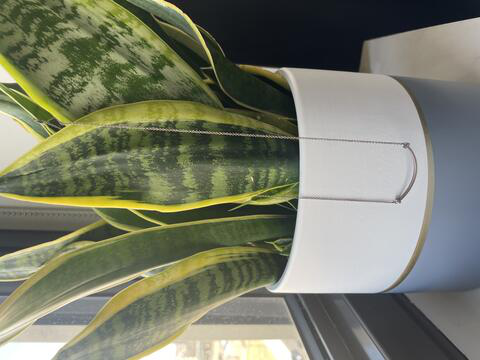

In [22]:
response = requests.get("https://media.rtm.com/thegreatexchange/thumbs/d5e5dafb-ea96-42d1-8857-e61527b83278-thumb.jpeg")
image_bytes = response.content
from PIL import Image
from io import BytesIO
from IPython.display import display
image = Image.open(BytesIO(image_bytes))
display(image)

In [ ]:
# close the browser
driver.quit()

## Load New Data

In [176]:
filename = "Copy of TheChateauSte.MichelleGreatEXchange_Valid Entries.xlsx"

new_data = pd.read_excel(filename)

new_data

,Photo,Date Entered,Date Live,Caption,Email,First Name,Last Name,BirthDate,Date Registered
0,https://media.rtm.com/thegreatexchange/large/9...,2/5/2023 12:11:18 PM,2/6/2023 10:04:19 AM,These were his holy grail and he wore them eve...,serahmichelle94@gmail.com,Serah,Chahiniab,8/2/1994 12:00:00 AM,2/5/2023 12:06:44 PM
1,https://media.rtm.com/thegreatexchange/large/9...,2/5/2023 12:15:08 PM,2/6/2023 10:04:33 AM,I don’t know why I still held on to this. It’s...,svminass@gmail.com,Lana,Minas,4/10/1993 12:00:00 AM,2/5/2023 12:08:46 PM
2,https://media.rtm.com/thegreatexchange/large/0...,2/5/2023 12:16:03 PM,2/6/2023 10:04:49 AM,I still have a sweatshirt from my ex we made f...,meghakdesai@hotmail.com,Megha,Desai,7/10/1999 12:00:00 AM,2/5/2023 12:09:55 PM
3,https://media.rtm.com/thegreatexchange/large/f...,2/5/2023 12:20:33 PM,2/6/2023 10:05:08 AM,Christmas present from 1st long term BF. Kept ...,jrcorrad@gmail.com,Julia,Corrado,2/23/1999 12:00:00 AM,2/5/2023 12:17:59 PM
4,https://media.rtm.com/thegreatexchange/large/d...,2/5/2023 12:36:27 PM,2/6/2023 10:05:21 AM,I receieved this druzy quartz necklace from an...,imcindy22@gmail.com,Suk,Chen,11/22/1985 12:00:00 AM,2/5/2023 12:20:49 PM
...,...,...,...,...,...,...,...,...,...
527,https://media.rtm.com/thegreatexchange/large/6...,2/13/2023 10:06:51 PM,2/13/2023 10:09:05 PM,"My EX left just this item, it's a pig. I just ...",demadeal@gmail.com,Hassan,smiley,NaN,2/10/2023 11:24:36 PM
528,https://media.rtm.com/thegreatexchange/large/7...,2/13/2023 10:08:48 PM,2/14/2023 9:50:12 AM,"So, this is a story. The scariest part was liv...",stasydeal@gmail.com,Anastasia,Pankratova,NaN,2/10/2023 11:25:53 PM
529,https://media.rtm.com/thegreatexchange/large/a...,2/13/2023 10:35:12 PM,2/13/2023 10:39:14 PM,I dated a guy for a few years and didn't even ...,wicked349@juno.com,Kim,Revere,NaN,2/12/2023 10:14:09 AM
530,https://media.rtm.com/thegreatexchange/large/2...,2/13/2023 11:23:23 PM,2/13/2023 11:36:47 PM,My ex’s favorite football jersey. It meant a l...,starlight81@gmail.com,Celena,Metzger,NaN,2/13/2023 11:19:28 PM


In [177]:
new_columns = ['Text','image_url','image_data']
new_data = new_data[['Caption', 'Photo', 'Photo']]
new_data.columns = new_columns
new_data.head(5)

,Text,image_url,image_data
0,These were his holy grail and he wore them eve...,https://media.rtm.com/thegreatexchange/large/9...,https://media.rtm.com/thegreatexchange/large/9...
1,I don’t know why I still held on to this. It’s...,https://media.rtm.com/thegreatexchange/large/9...,https://media.rtm.com/thegreatexchange/large/9...
2,I still have a sweatshirt from my ex we made f...,https://media.rtm.com/thegreatexchange/large/0...,https://media.rtm.com/thegreatexchange/large/0...
3,Christmas present from 1st long term BF. Kept ...,https://media.rtm.com/thegreatexchange/large/f...,https://media.rtm.com/thegreatexchange/large/f...
4,I receieved this druzy quartz necklace from an...,https://media.rtm.com/thegreatexchange/large/d...,https://media.rtm.com/thegreatexchange/large/d...


In [181]:
new_data['category'] = new_data['Text'].apply(getCategory)
new_data['category'].value_counts()

CLOTHING         121
JEWELARY          79
OTHER             67
GIFT              45
ITEM              39
VALENTINE         37
CHRISTMAS         27
CHEATED           23
TRIP              21
BIRTHDAY          20
SPORTS            10
ANNIVERSARY        9
DIVORCE            8
ANIMAL             7
ROSES              6
LONG DISTANCE      3
MUSIC              2
HOLIDAY            2
FOOT WEAR          2
TREASURE           1
TATTOO KIT         1
FOOD               1
HALOWEEN           1
Name: category, dtype: int64

In [14]:
import spacy

NER = spacy.load("en_core_web_sm")

In [34]:
raw_text = new_data['Text'].values[9]
raw_text

'I got this book from an ex!  He knew i loved to read and that I loved this author. It was actually really sweet but he cheated on me so we don’t care! Still kept the book though! '

In [35]:
# Extract named entities from the sentence
text1= NER(raw_text)
for word in text1.ents:
    print(word.text,word.label_)

In [182]:
new_data['Text'] = new_data['Text'].str.replace(",", "")

In [188]:
new_data[new_data['Text'].str.contains(" wine ")]['Text'].values

array(["My Ex and I used to play Scrabble during wine nights. One Christmas he gifted me a Scrabble dictionary that he wrapped that morning with duct tape and leftover wrapping paper. It was then I realized that we would never really see eye to eye. Christmas is my absolute vibe and he despised every bit of it. All these words and he still didn't know how to communicate. ",
       'Long story short my ex and I had frequent wine nights. For a surprise gift I got a personalized wine glass. I kept it for the esthetics so I thought. To release my thoughts from my ex I shattered it and threw the remains in the trash. ',
       'My ex was terrible at giving me thoughtful gifts. He was very good at the cliche but that’s not me at all. These wineglasses were the last gift he gave me (valentines day) and he finally figured it out. I love wine the sunflowers were hand painted by a local artist and they represent a birthmark on my leg I tattooed into a sunflower. It’s been tough to give them up b

In [183]:
new_data.to_csv("images_text_analysis.csv", index=False)

In [179]:
new_data[new_data['category'] == "OTHER"]['Text'].values

array(['I don’t know why I still held on to this. It’s cheesy and we only dated for 3 months, happy to trade it in. We met on an app and if I could take that swipe back I would. The most rushed and possibly awkward three months and this is my souvenir.  He didn’t have a particular reason for getting and just chucked it at me. Fun times. I guess I held on to it as a lesson to not waste my time. ',
       'This was from my ex and it was in storage for a few years with my dads stuff so when he emptied storage my kid claimed it! Lol i couldnt tell her no',
       'This ugly little thing is a stress squeezy thing! My ex’s sister gave it to him and we lived together so it just sat on my work desk! He decided to move out one day without telling me but left some stuff behind including this thing! I would squeeze it like its him but I’ve let that hurt go! So long ugly stress man! ',
       "Well it's kinda a.crazy item of my ex.. It's his old hairbrush. I use it everyday and I think of him when

In [118]:
img_url = new_data['image_url'].values[6]
img_url

'https://media.rtm.com/thegreatexchange/large/344421c9-275c-4104-9067-ba221be299d3.jpeg'

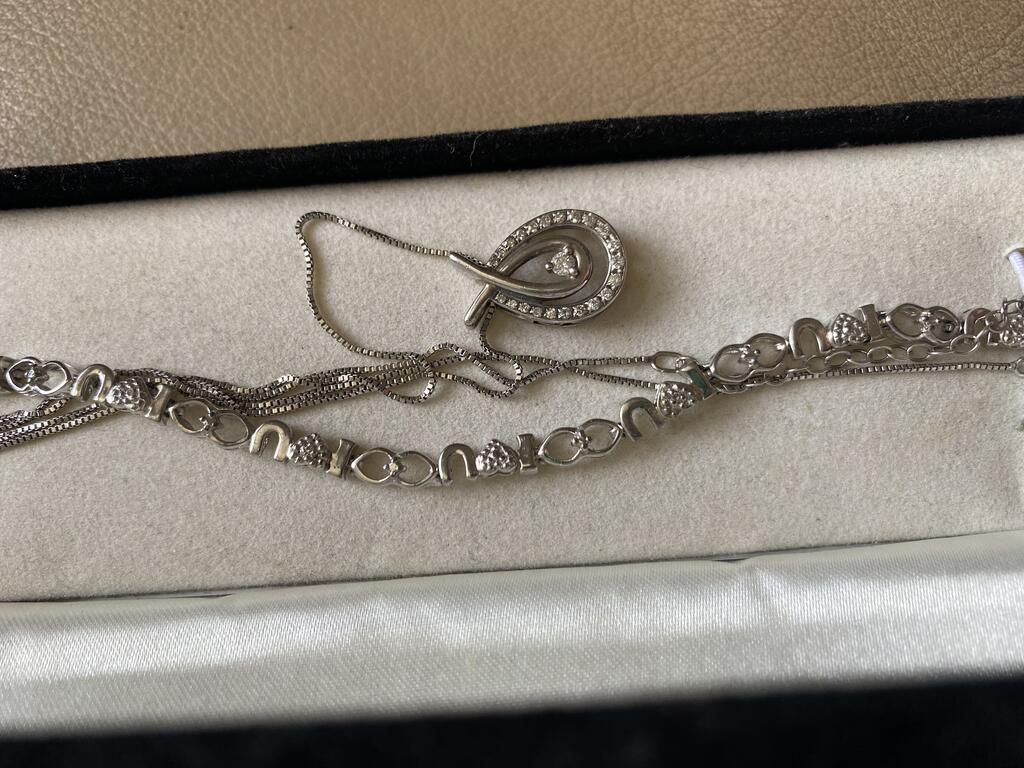

In [119]:
response = requests.get(img_url)
image_bytes = response.content
from PIL import Image
from io import BytesIO
from IPython.display import display
image = Image.open(BytesIO(image_bytes))
display(image)

In [122]:
import numpy as np
import cv2
import time

with open('darknet-master//darknet-master//data//coco.names') as f:        #set path of coco dataset names
    # Getting labels reading every line
    # and putting them into the list
    labels = [line.strip() for line in f]


network = cv2.dnn.readNetFromDarknet('darknet-master//darknet-master//cfg//yolov3.cfg',       #set path for yolo3 config file 
                                     'darknet-master//darknet-master//cfg//yolov3.weights')   #set path for yolo3 weights

# Getting list with names of all layers from YOLO v3 network
layers_names_all = network.getLayerNames()

# Getting only output layers' names that we need from YOLO v3 algorithm
# with function that returns indexes of layers with unconnected outputs
layers_names_output = \
    [layers_names_all[i[0] - 1] for i in network.getUnconnectedOutLayers()]

# Setting minimum probability to eliminate weak predictions
probability_minimum = 0.5

# Setting threshold for filtering weak bounding boxes
# with non-maximum suppression
threshold = 0.3

# Generating colours for representing every detected object
# with function randint(low, high=None, size=None, dtype='l')
colours = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')

In [123]:
labels

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [124]:
network

<dnn_Net 0000019C46A838D0>

In [125]:
frame = np.array(image) 
# blob = cv2.dnn.blobFromImage(image, scalefactor=1.0, size, mean, swapRB=True)
blob = cv2.dnn.blobFromImage(frame, 1 / 255.0, (416, 416),
                                 swapRB=True, crop=False)

In [126]:
"""
Implementing Forward pass
"""
# Implementing forward pass with our blob and only through output layers
# Calculating at the same time, needed time for forward pass
network.setInput(blob)  # setting blob as input to the network
output_from_network = network.forward(layers_names_output)

In [128]:
for i in output_from_network:
    # Going through all detections from current output layer
    for detected_objects in result:
        # Getting 80 classes' probabilities for current detected object
        scores = detected_objects
        # Getting index of the class with the maximum value of probability
        class_current = np.argmax(scores)
        class_score = np.max(scores)
        if class_score > 0.99:
            print(labels[class_current])

person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
bicycle
bicycle
bicycle
bicycle
bi

### Clustering

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

def kmeans_elbow(df):
    """
    Applies KMeans clustering to the data in a pandas dataframe using the Elbow method.
    Args:
        df (pandas.DataFrame): The input dataframe, which must have a 'Text' column.
        max_k (int): The maximum number of clusters to test.
    Returns:
        A matplotlib figure showing the results of the Elbow method.
    """
    # create a vectorizer to transform the text data into numerical features
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(df['Text'].str.lower())

    # run KMeans clustering with a range of cluster numbers, and record the inertia for each number of clusters
    inertias = []
    CLUSTERS = [200, 220, 230, 235, 240, 245, 250, 255, 260, 265, 270, 280, 290, 300]
    for k in CLUSTERS:
        print("Clusters = ", k)
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    # plot the results using the Elbow method
    plt.plot(CLUSTERS, inertias)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

Clusters =  200
Clusters =  220
Clusters =  230
Clusters =  235
Clusters =  240
Clusters =  245
Clusters =  250
Clusters =  255
Clusters =  260
Clusters =  265
Clusters =  270
Clusters =  280
Clusters =  290
Clusters =  300


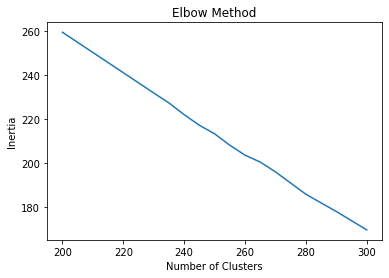

In [142]:
kmeans_elbow(new_data)

In [144]:
new_data_df = new_data.copy()

In [149]:
new_data.shape

(532, 4)

In [151]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(new_data['Text'].str.lower())
kmeans = KMeans(n_clusters=100, random_state=42)
kmeans.fit(X)
new_data_df["Cluster"] = kmeans.predict(X)
new_data_df["Cluster"].value_counts()

3     23
33    14
4     13
27    13
7     11
      ..
22     2
82     2
1      2
8      1
88     1
Name: Cluster, Length: 100, dtype: int64

### Sentiment Analysis

In [152]:
# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    if sentiment_dict['compound'] >= 0.05 :
        return "Positive"
    elif sentiment_dict['compound'] <= - 0.05 :
        return "Negative"
    else :
        return "Neutral"

In [153]:
new_data_df["Sentiment"] = new_data_df["Text"].apply(sentiment_scores)
new_data_df["Sentiment"].value_counts()

Positive    368
Negative    109
Neutral      55
Name: Sentiment, dtype: int64

In [159]:
new_data["category"].value_counts()

OTHER            168
JEWELARY          79
GIFT              55
VALENTINE         38
CLOTHING          33
CHRISTMAS         27
ITEM              25
CHEATED           24
TRIP              21
BIRTHDAY          20
ANNIVERSARY        9
DIVORCE            8
ROSES              6
SPORTS             4
LONG DISTANCE      3
FOOT WEAR          3
MUSIC              3
HOLIDAY            2
TREASURE           1
TATTOO KIT         1
FOOD               1
HALOWEEN           1
Name: category, dtype: int64

In [160]:
new_data_df["Text"] = new_data_df["Text"].str.replace(",", "")

In [161]:
new_data_df

,Text,image_url,image_data,category,Cluster,Sentiment
0,These were his holy grail and he wore them eve...,https://media.rtm.com/thegreatexchange/large/9...,https://media.rtm.com/thegreatexchange/large/9...,TREASURE,60,Negative
1,I don’t know why I still held on to this. It’s...,https://media.rtm.com/thegreatexchange/large/9...,https://media.rtm.com/thegreatexchange/large/9...,OTHER,52,Positive
2,I still have a sweatshirt from my ex we made f...,https://media.rtm.com/thegreatexchange/large/0...,https://media.rtm.com/thegreatexchange/large/0...,ANNIVERSARY,97,Positive
3,Christmas present from 1st long term BF. Kept ...,https://media.rtm.com/thegreatexchange/large/f...,https://media.rtm.com/thegreatexchange/large/f...,CHRISTMAS,34,Positive
4,I receieved this druzy quartz necklace from an...,https://media.rtm.com/thegreatexchange/large/d...,https://media.rtm.com/thegreatexchange/large/d...,JEWELARY,47,Positive
...,...,...,...,...,...,...
527,My EX left just this item it's a pig. I just h...,https://media.rtm.com/thegreatexchange/large/6...,https://media.rtm.com/thegreatexchange/large/6...,OTHER,77,Positive
528,So this is a story. The scariest part was livi...,https://media.rtm.com/thegreatexchange/large/7...,https://media.rtm.com/thegreatexchange/large/7...,OTHER,83,Negative
529,I dated a guy for a few years and didn't even ...,https://media.rtm.com/thegreatexchange/large/a...,https://media.rtm.com/thegreatexchange/large/a...,OTHER,72,Positive
530,My ex’s favorite football jersey. It meant a l...,https://media.rtm.com/thegreatexchange/large/2...,https://media.rtm.com/thegreatexchange/large/2...,CLOTHING,36,Positive


In [163]:
new_data_df[['image_url', 'Cluster', 'Sentiment']].to_csv("clustering_sentiment.csv", index=False)

In [193]:
import pandas as pd

# create a sample dataframe with a datetime column
mg_orders = pd.DataFrame({'Date': pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')})

# define your fiscal calendar start month and week
fiscal_start_month = 7
fiscal_start_week = 1

# calculate fiscal week number
mg_orders['fiscalweek'] = ((mg_orders['Date'].dt.month - fiscal_start_month) % 12 // 3 + 1) * (mg_orders['Date'].dt.weekofyear >= fiscal_start_week) + \
                   ((mg_orders['Date'].dt.month - fiscal_start_month - 1) % 12 // 3 + 1) * (mg_orders['Date'].dt.weekofyear < fiscal_start_week)

# display the result
mg_orders.head()

,Date,fiscalweek
0,2022-01-01,3
1,2022-01-02,3
2,2022-01-03,3
3,2022-01-04,3
4,2022-01-05,3
